In [1]:
# reference 
# https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_coclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-coclustering-py


In [29]:
print(__doc__)

# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score


Automatically created module for IPython interactive environment


Text(0.5, 1.05, 'Original dataset')

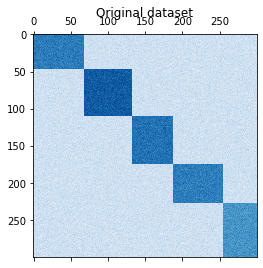

In [30]:
# The dataset is generated using the make_biclusters function, 
# which creates a matrix of small values and implants bicluster with large values.
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")


Text(0.5, 1.05, 'Shuffled dataset')

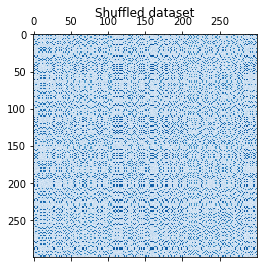

In [31]:
# The rows and columns are then shuffled
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")


In [32]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))



consensus score: 1.000


In [33]:
print(model.row_labels_)

[2 2 4 2 1 0 1 2 3 3 1 4 2 1 4 3 1 3 1 0 2 3 0 0 2 0 2 1 1 1 3 3 4 0 2 0 2
 2 1 4 2 3 3 4 3 0 1 3 4 4 3 2 0 3 3 1 0 4 1 0 0 0 3 1 1 2 1 0 4 4 0 1 1 4
 0 1 4 3 2 0 0 0 1 2 1 3 2 2 1 1 1 4 1 2 0 0 3 3 2 4 1 1 0 0 3 2 1 2 1 2 0
 0 4 3 1 3 0 1 3 4 4 0 4 3 3 3 0 2 0 4 3 0 3 3 0 2 1 1 4 1 4 3 2 4 0 0 4 4
 3 1 2 4 1 1 1 3 3 4 1 3 2 3 4 2 3 4 4 0 3 1 1 0 2 3 2 2 0 2 1 4 0 0 1 2 0
 0 1 3 2 3 2 0 4 2 0 4 3 1 3 1 1 1 3 3 3 3 1 0 2 4 1 0 0 3 2 3 2 0 1 1 2 4
 3 2 3 0 0 0 1 1 0 1 3 3 1 4 0 3 4 3 0 1 3 4 0 1 2 4 3 0 3 4 1 1 4 0 3 1 0
 4 2 0 0 1 2 4 4 0 2 1 1 0 1 2 3 2 1 0 1 3 4 0 1 0 1 4 2 3 3 3 1 1 2 4 2 1
 2 0 4 0]


In [34]:
np.argsort(model.row_labels_)

array([299,  74, 144, 145, 230, 227, 226,  45, 225, 217, 212, 211,  52,
       110, 207, 167,  56,  81, 180, 181, 171,  70, 184, 185, 240,  67,
       194,  79,  80,  61,  60,  59, 191,  35, 236,  33, 131, 128, 271,
       126, 121, 277,  95, 281, 283, 102,   5, 103, 111, 297, 116,  19,
       267, 261, 244, 249, 134, 262,  94,  25, 255,  23,  22, 258, 176,
       154, 158, 117, 169, 153, 170, 152, 136, 139, 114, 137, 210, 182,
       295, 291, 290, 284, 282, 278, 276, 272, 270, 269, 263, 257, 253,
       178, 252, 241, 234, 231, 229, 228, 219, 218, 206, 201, 200, 199,
       197, 186, 245, 108, 149,  64,  29,  28,  92,  27,  58,  84,  63,
        18,  46,  16,  13,  90,  88,  89,  66, 106,  75,  82,  72,  10,
       101,  71,   4,  38,   6, 100,  55,  51, 208, 216, 214, 109, 193,
        65, 190, 188, 183, 177, 107, 220,  34,  40,   1, 296, 294, 292,
         3, 286,   7,  12, 275, 223, 273, 264,  20, 260,  24,  26, 246,
       175,  36,  37, 268, 174,   0, 172, 160,  87,  98, 142, 16

In [35]:
print(model.column_labels_)

[0 3 3 4 4 1 3 2 2 2 0 0 2 0 0 0 0 2 2 4 2 3 0 2 2 1 4 3 3 3 2 0 4 4 4 0 4
 4 0 3 2 1 4 2 0 2 1 2 2 4 4 0 4 4 1 3 3 1 4 2 4 4 1 2 2 2 3 3 1 4 1 3 2 2
 4 4 4 1 1 4 4 4 2 2 2 4 3 0 0 2 0 3 2 3 2 4 0 2 2 4 0 1 0 1 1 1 4 3 0 3 0
 3 1 3 0 3 4 3 3 3 1 2 0 4 1 0 3 2 3 2 2 1 2 2 0 3 3 0 2 4 2 1 3 2 0 3 2 3
 2 3 0 3 0 4 0 1 1 3 3 0 3 3 4 2 4 4 3 4 2 0 1 1 1 3 0 2 4 3 3 2 3 0 4 0 2
 0 3 3 4 0 4 4 2 4 3 1 1 0 3 4 0 4 2 2 4 4 3 1 2 1 2 1 1 4 2 3 1 4 1 1 2 2
 0 3 0 3 4 1 4 4 3 2 1 2 2 4 0 4 0 0 2 4 3 4 1 1 4 2 0 1 4 3 4 0 3 0 4 0 2
 1 1 4 0 4 0 1 2 4 2 2 3 3 4 1 3 0 0 3 2 1 0 2 2 3 4 3 0 3 4 4 3 2 4 2 0 3
 3 4 1 2]


In [36]:
np.argsort(model.column_labels_)

array([  0, 255, 253,  35, 248,  38, 108, 159,  44, 239, 102, 238, 236,
       100,  51, 169,  96, 224, 222, 174,  90, 181,  88,  87, 183, 185,
       189, 197, 257,  31, 200,  14, 280,  11, 144, 125,  13, 110,  15,
        16, 276, 275,  10, 137, 286, 150,  22, 152, 114, 294, 154, 264,
       262, 134, 122, 195, 196, 141, 124,  78, 155, 171, 170, 101, 120,
       298, 103, 104, 105,  77, 112, 172, 156, 212,  25, 244, 232, 273,
        54, 227,  57, 260, 279,  41, 219,  62, 207, 218, 245,   5, 131,
       211,  68, 249,  70, 209, 265, 259, 216,  46, 268, 266, 203, 148,
       146, 143, 281, 282, 140, 138, 291, 293, 269, 278, 240, 247, 202,
       208, 210, 192, 214, 184, 220, 179, 175, 221, 231, 168, 233, 234,
       163, 258, 133, 299, 130,  94,  92,  89,  84,  83,  82,  73,  72,
        65, 132,  63,  59,  48,  47,  45,  43,  40,  30,  24,  23,  20,
        18,  17,  12,   9,   8,   7,  97,  98,  64, 129, 121, 127, 126,
       270, 271, 151, 115, 215,  66,  21,  67,  71, 111, 206, 27

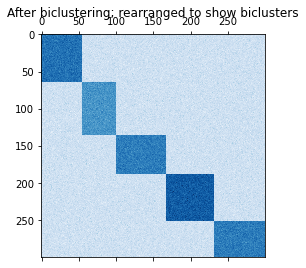

In [37]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()